In [14]:
# 使用sklearn数据集训练逻辑回归模型
# 调整学习率，观察训练结果
# 把模型训练参数保存到文件，在另一个代码中加载参数实现预测功能
from sklearn.datasets import load_iris

X,y = load_iris(return_X_y=True)
print(X.shape)
print(y.shape)


(150, 4)
(150,)


In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
import numpy as np

# X = X[0:100]
# y = y[0:100]


# X = np.concatenate([X[0:50],X[100:150]])
# y[100:150] = 1
# y = np.concatenate([y[0:50],y[100:150]])


X = X[50:150]
y = y[50:150]
y = y - 1


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=64)   # 固定随机种子，保证每次切分的数据一样，便于探究学习率对模型的影响

In [18]:
# 定义超参数
# 权重参数
theta = np.random.randn(5)
# 偏差
# bias = theta[0]
# 学习率
# lr = 0.01
lr = [0.001,0.01,0.1,0.3,0.5,0.8,1,2,5,10]
# 迭代次数
epoch = 100


In [19]:
def forward(X,theta):
    z = np.dot(X,theta[1:]) + theta[0]
    y_hat = 1/(1+np.exp(-z))
    return y_hat

In [20]:
# 损失函数
def loss(y,y_hat):
    e = 1e-8
    return -np.mean(y*np.log(y_hat+e)+(1-y)*np.log(1-y_hat+e))

In [21]:
# 梯度计算函数
def calc_gradient(X,y,y_hat):
    gradient = np.zeros(5)   
    gradient[0] = np.mean(y_hat-y)
    gradient[1:] = np.dot(y_hat-y,X)/len(y)
    return gradient

In [22]:
# # 模型训练
# for i in range(epoch):
#    # 前向传播
#    y_hat = forward(X_train,theta)
#    # 计算损失
#    loss_val = loss(y_train,y_hat)
#    # 计算梯度
#    gradient = calc_gradient(X_train,y_train,y_hat)
#    # 更新参数
#    # theta = theta - lr*gradient
#    theta = theta - lr*gradient
#    # 计算准确率
#    acc = np.mean(np.round(y_hat) == y_train)
#    if i%10 == 0:
#          print(f'epoch:{i},loss:{loss_val},acc:{acc}')




In [ ]:
# 保存模型参数
# np.save('theta.npy',theta)

In [ ]:
# 加载模型参数
# theta = np.load('theta.npy')
# print(theta)

# # 预测
# y_hat = forward(X_test,theta)
# acc = np.mean(np.round(y_hat) == y_test)
# print(f'acc:{acc}')

In [23]:

accs = []
for l in lr:
      theta = np.random.randn(5)
      theta[0] = 0
      for i in range(epoch):
            y_hat = forward(X_train,theta)
            loss_val = loss(y_train,y_hat)
            gradient = calc_gradient(X_train,y_train,y_hat)
            theta = theta - l*gradient
            acc = np.mean(np.round(y_hat) == y_train)
      print(theta)
      accs.append(acc)



[ 0.00937329 -0.57772539  1.21646313  0.15294527 -0.49384293]
[-0.26651604  0.12337093 -1.31522276  0.63623542  0.13383596]
[-0.34989906 -1.5312045   0.74263526  1.06857541  1.53884797]
[-0.93995309 -2.14676627 -1.69475203  4.14920451  2.80531304]
[-2.02506691 -4.21114712 -4.9454087   5.41859357  5.1820126 ]
[-3.45950904 -7.45535158 -4.26703019  7.66861752  8.40153729]
[ -4.32257786 -10.12291921  -4.95793555  10.7129825    9.56697054]
[ -8.64416113 -21.73597978  -8.60755439  22.6762271   19.00685924]
[-21.27600607 -52.06326438 -26.80773182  56.88848663  47.96954325]
[-37.99560146 -71.49710462 -39.78801486 134.94968537 108.25461411]


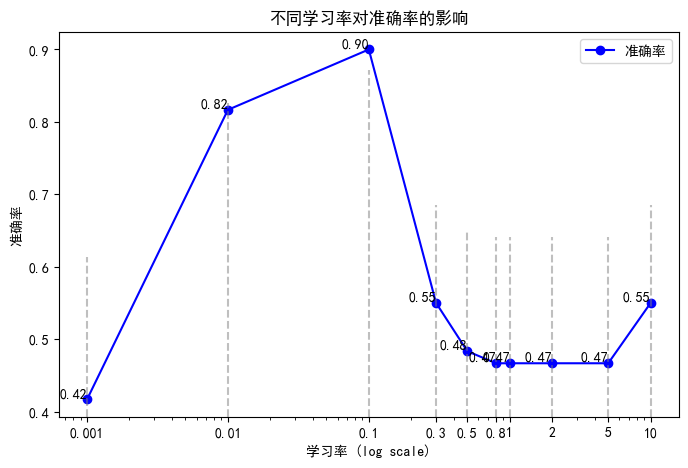

In [24]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

# 学习率和对应的准确率
lr = [0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1, 2, 5, 10]


plt.rcParams["font.sans-serif"] = ["SimHei"]

# 创建折线图
plt.figure(figsize=(8, 5))
plt.plot(lr, accs, marker='o', linestyle='-', color='b', label="准确率")

# **设置横坐标为对数刻度**
plt.xscale('log')

# 重新设置刻度，使其更均匀分布
plt.xticks(lr, labels=[str(x) for x in lr])  

# 给每个点添加数值标注
for x, y in zip(lr, accs):
    plt.text(x, y, f"{y:.2f}", ha='right', va='bottom', fontsize=10)  

# 设置标题、标签
plt.xlabel("学习率 (log scale)")
plt.ylabel("准确率")
plt.title("不同学习率对准确率的影响")
# 每个点对应的点用竖线连接
for x, y in zip(lr, accs):
    plt.axvline(x, 0, y, linestyle='--', color='gray', alpha=0.5)
plt.legend()
plt.show()



In [25]:
# 保存模型参数
np.save('theta.npy',theta)

In [26]:
# 加载模型参数
theta = np.load('theta.npy')
print(theta)

# 预测
y_hat = forward(X_test,theta)
acc = np.mean(np.round(y_hat) == y_test)
print(f'acc:{acc}')

[-37.99560146 -71.49710462 -39.78801486 134.94968537 108.25461411]
acc:0.55


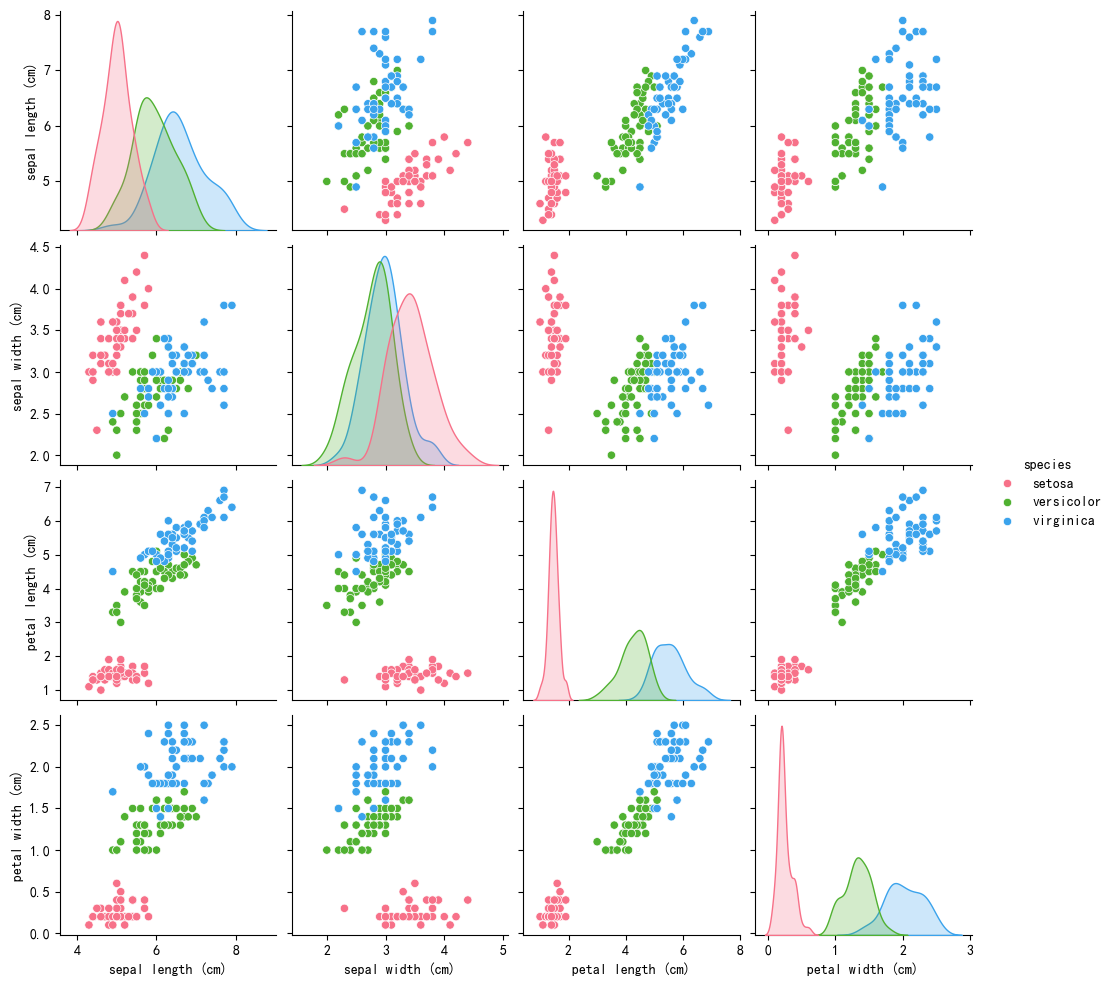

<Figure size 640x480 with 0 Axes>

In [29]:
# 探究鸢尾花数据集的特征空间分布
import seaborn as sns
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

# 加载鸢尾花数据集
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# 添加类别标签
df['species'] = iris.target
species_names = iris.target_names
df['species'] = df['species'].apply(lambda x: species_names[x])  # 将数值标签转换为类别名

# 使用 pairplot 观察特征分布
sns.pairplot(df, hue="species", palette="husl", diag_kind="kde")  
plt.show()

# 保存图片
plt.savefig('pairplot.png')
